In [1]:
import requests 
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
print("done")

done


In [2]:
# Where is the majoirty of crime occuring?
# What is the most frequent category of offence? 
# Is there a trend in category of offence over time? (time series analysis)

params = {
    'lat': 50.805832,  # Latitude of Portsmouth
    'lng': -1.087222,   # Longitude of Portsmouth  
    'date': '2024-01'
}

response = requests.get("https://data.police.uk/api/crimes-street/all-crime", params=params)
print(response)

<Response [200]>


In [3]:
crime_json = response.json()
df = pd.DataFrame(crime_json)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.drop(labels=['context', 'persistent_id', 'location_subtype'], axis=1, inplace=True)
df.head()

,category,location_type,location,outcome_status,id,month
0,anti-social-behaviour,Force,"{'latitude': '50.800578', 'street': {'id': 1554507, 'name': 'On or near Parking Area'}, 'longitude': '-1.087209'}",None,116212600,2024-01
1,anti-social-behaviour,Force,"{'latitude': '50.813457', 'street': {'id': 1554834, 'name': 'On or near Kingston Crescent'}, 'longitude': '-1.082842'}",None,116222233,2024-01
2,anti-social-behaviour,Force,"{'latitude': '50.798966', 'street': {'id': 1553938, 'name': 'On or near Aylward Street'}, 'longitude': '-1.100750'}",None,116211345,2024-01
3,anti-social-behaviour,Force,"{'latitude': '50.800709', 'street': {'id': 1554512, 'name': 'On or near Buckingham Street'}, 'longitude': '-1.087874'}",None,116211353,2024-01
4,anti-social-behaviour,Force,"{'latitude': '50.802111', 'street': {'id': 1555602, 'name': 'On or near Andrew Close'}, 'longitude': '-1.067241'}",None,116211356,2024-01


In [4]:
for row in df:
    print(f"{row}: " + str(df[row].isnull().sum()))

category: 0
location_type: 0
location: 0
outcome_status: 68
id: 0
month: 0


In [5]:
df['id'].duplicated().sum()

0

In [6]:
df['month'].value_counts()

2024-01    966
Name: month, dtype: int64

In [7]:
df.dtypes
df['month'] = pd.to_datetime(df['month'])
df.dtypes

category                  object
location_type             object
location                  object
outcome_status            object
id                         int64
month             datetime64[ns]
dtype: object

In [8]:
outcome_status = []
for row in df['outcome_status']:
    if row is not None:
        outcome_status.append(row['category'])
    else:
        outcome_status.append('None')

df['outcome_status'] = outcome_status
df.sample(10)

,category,location_type,location,outcome_status,id,month
354,public-order,Force,"{'latitude': '50.793843', 'street': {'id': 1554548, 'name': 'On or near Henrietta Place'}, 'longitude': '-1.087255'}",Unable to prosecute suspect,116210882,2024-01-01
25,anti-social-behaviour,Force,"{'latitude': '50.818547', 'street': {'id': 1555012, 'name': 'On or near Connaught Road'}, 'longitude': '-1.079406'}",None,116219396,2024-01-01
916,violent-crime,Force,"{'latitude': '50.801747', 'street': {'id': 1554542, 'name': 'On or near Jacob's Street'}, 'longitude': '-1.087243'}",Unable to prosecute suspect,116210022,2024-01-01
52,anti-social-behaviour,Force,"{'latitude': '50.802111', 'street': {'id': 1555602, 'name': 'On or near Andrew Close'}, 'longitude': '-1.067241'}",None,116221209,2024-01-01
91,burglary,Force,"{'latitude': '50.810153', 'street': {'id': 1555374, 'name': 'On or near Langley Road'}, 'longitude': '-1.073184'}",Under investigation,116221222,2024-01-01
740,violent-crime,Force,"{'latitude': '50.795567', 'street': {'id': 1555416, 'name': 'On or near Petrol Station'}, 'longitude': '-1.073032'}",Unable to prosecute suspect,116218036,2024-01-01
922,violent-crime,Force,"{'latitude': '50.803650', 'street': {'id': 1555186, 'name': 'On or near Woodland Street'}, 'longitude': '-1.075371'}",Action to be taken by another organisation,116221706,2024-01-01
900,violent-crime,Force,"{'latitude': '50.793843', 'street': {'id': 1554548, 'name': 'On or near Henrietta Place'}, 'longitude': '-1.087255'}",Under investigation,116210881,2024-01-01
535,vehicle-crime,Force,"{'latitude': '50.798507', 'street': {'id': 1555264, 'name': 'On or near Ariel Road'}, 'longitude': '-1.075472'}",Investigation complete; no suspect identified,116213433,2024-01-01
587,violent-crime,Force,"{'latitude': '50.817905', 'street': {'id': 1555094, 'name': 'On or near Montague Road'}, 'longitude': '-1.076665'}",Unable to prosecute suspect,116210543,2024-01-01


In [9]:
location = []
for row in df['location']:
    crime_loc = row['street']['name']
    crime_loc = crime_loc.replace('On or near', '')
    location.append(crime_loc)

df['location'] = location
df.sample(10)

,category,location_type,location,outcome_status,id,month
756,violent-crime,Force,Charles Dickens Street,Unable to prosecute suspect,116214695,2024-01-01
245,other-theft,Force,Dugald Drummond Street,Investigation complete; no suspect identified,116211344,2024-01-01
32,anti-social-behaviour,Force,Harcourt Road,None,116216030,2024-01-01
499,vehicle-crime,Force,Clarendon Street,Investigation complete; no suspect identified,116217286,2024-01-01
45,anti-social-behaviour,Force,Basin Street,None,116214324,2024-01-01
473,shoplifting,Force,Petrol Station,Further investigation is not in the public interest,116212624,2024-01-01
23,anti-social-behaviour,Force,Mill Lane,None,116219917,2024-01-01
318,public-order,Force,Cornwallis Crescent,Investigation complete; no suspect identified,116212194,2024-01-01
327,public-order,Force,Cornwallis Crescent,Unable to prosecute suspect,116213863,2024-01-01
323,public-order,Force,Jacob's Street,Unable to prosecute suspect,116216841,2024-01-01


([0, 1, 2, 3, 4],
 [Text(0, 0, 'violent-crime'),
  Text(1, 0, 'criminal-damage-arson'),
  Text(2, 0, 'public-order'),
  Text(3, 0, 'shoplifting'),
  Text(4, 0, 'anti-social-behaviour')])

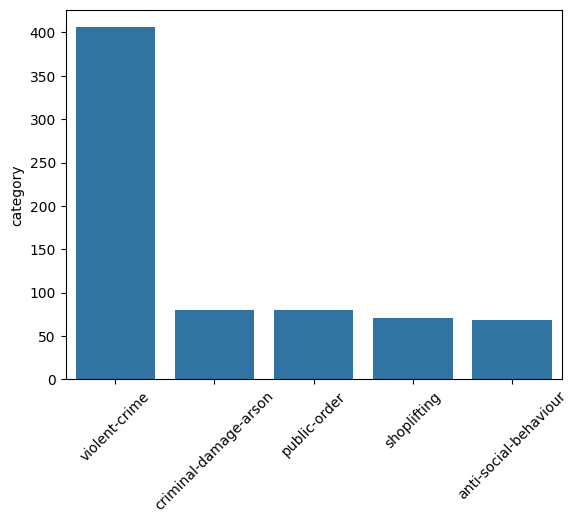

In [10]:
top_5_crime = df['category'].value_counts()[:5]
sns.barplot(top_5_crime)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ' Parking Area'),
  Text(1, 0, ' Supermarket'),
  Text(2, 0, ' Henrietta Place'),
  Text(3, 0, ' Guildhall Walk'),
  Text(4, 0, ' Shopping Area')])

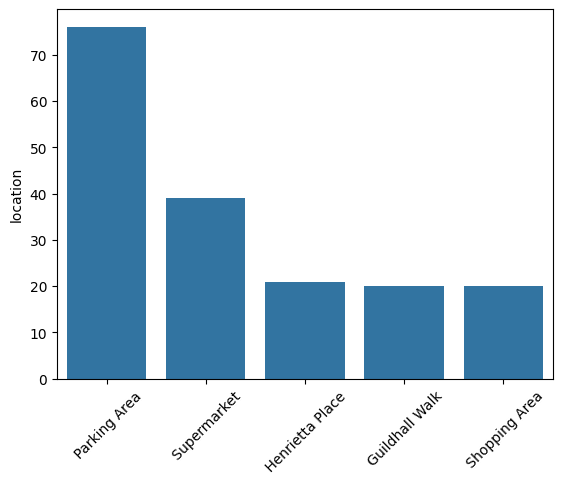

In [11]:
top_5_loc = df['location'].value_counts()[:5]
sns.barplot(top_5_loc)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Force'), Text(1, 0, 'BTP')])

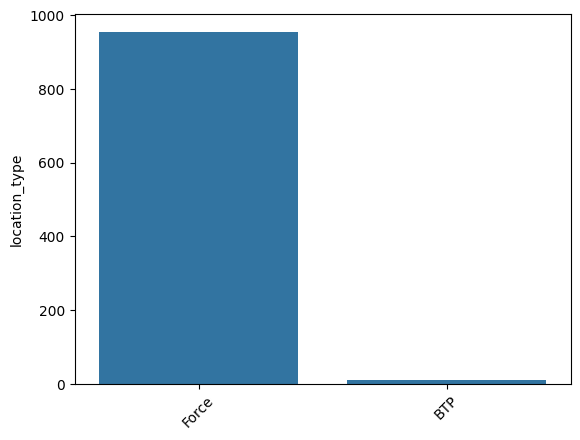

In [12]:
loc_type = df['location_type'].value_counts()
sns.barplot(loc_type)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Investigation complete; no suspect identified'),
  Text(1, 0, 'Unable to prosecute suspect'),
  Text(2, 0, 'Under investigation'),
  Text(3, 0, 'None'),
  Text(4, 0, 'Awaiting court outcome')])

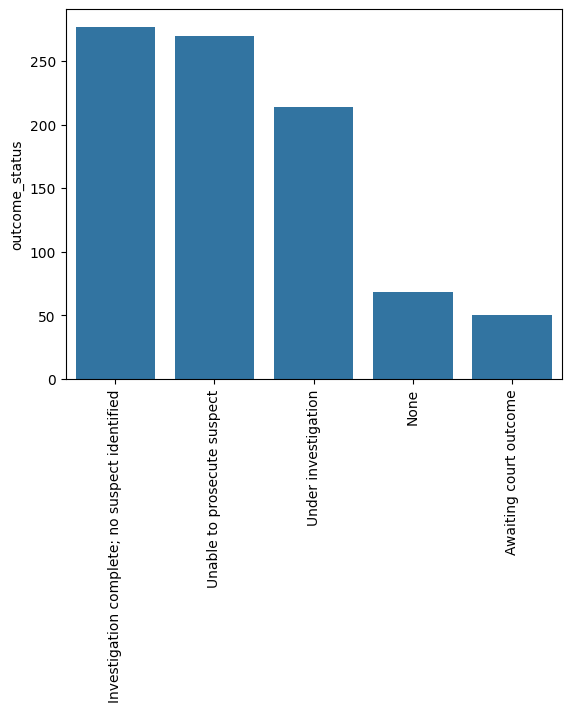

In [13]:
status = df['outcome_status'].value_counts()[:5]
sns.barplot(status)
plt.xticks(rotation=90)

In [15]:
df.shape

(966, 6)

In [16]:
df.to_csv("Crimes_Port_2024_01", index=False)